In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [4]:
#Загружаем первый датасет
df_bp = pd.read_excel('/content/X_bp.xlsx')
df_bp.head(2)

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0           0                         1.857143            2030.0   
1           1                         1.857143            2030.0   

   Модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                         30.0   
1             738.736842                         50.0   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                         3000.0                    220.0  
1                         3000.0                    220.0

In [6]:
#Удаляем первый неинформативный столбец
df_bp.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
# Проверим размерность первого файла
df_bp.shape

(1023, 10)

In [8]:
# Загружаем второй датасет
df_nup = pd.read_excel('/content/X_nup.xlsx')
df_nup.head(2)

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0           0                   0          4.0               57.0
1           1                   0          4.0               60.0

In [9]:
#Удаляем первый неинформативный столбец
df_nup.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
# Проверим размерность второго файла
df_nup.shape

(1040, 3)

In [11]:
# Объединим по индексу, тип объединения INNER, смотрим итоговый датасет
df = df_bp.merge(df_nup, left_index = True, right_index = True, how = 'inner')
df.head().T

0            1            2  \
Соотношение матрица-наполнитель          1.857143     1.857143     1.857143   
Плотность, кг/м3                      2030.000000  2030.000000  2030.000000   
Модуль упругости, ГПа                  738.736842   738.736842   738.736842   
Количество отвердителя, м.%             30.000000    50.000000    49.900000   
Содержание эпоксидных групп,%_2         22.267857    23.750000    33.000000   
Температура вспышки, С_2               100.000000   284.615385   284.615385   
Поверхностная плотность, г/м2          210.000000   210.000000   210.000000   
Модуль упругости при растяжении, ГПа    70.000000    70.000000    70.000000   
Прочность при растяжении, МПа         3000.000000  3000.000000  3000.000000   
Потребление смолы, г/м2                220.000000   220.000000   220.000000   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              4.000000     4.000000     4.000000   
Плотность нашивки                       57.000000    60.000000    70.000000   

                                                3            4  
Соотношение матрица-наполнитель          1.857143     2.771331  
Плотность, кг/м3                      2030.000000  2030.000000  
Модуль упругости, ГПа                  738.736842   753.000000  
Количество отвердителя, м.%            129.000000   111.860000  
Содержание эпоксидных групп,%_2         21.250000    22.267857  
Температура вспышки, С_2               300.000000   284.615385  
Поверхностная плотность, г/м2          210.000000   210.000000  
Модуль упругости при растяжении, ГПа    70.000000    70.000000  
Прочность при растяжении, МПа         3000.000000  3000.000000  
Потребление смолы, г/м2                220.000000   220.000000  
Угол нашивки, град                       0.000000     0.000000  
Шаг нашивки                              5.000000     5.000000  
Плотность нашивки                       47.000000    57.000000

In [12]:
# Проверим размерность итогового датасета
df.shape

(1023, 13)

In [13]:
#Просмотрим информацию о датасете, проверим тип данных в каждом столбце (типы признаков)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   Модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [14]:
#Изучим описательную статистику наших данных
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
Модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
Модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
Модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [15]:
# Проверим датасет на дубликаты
# Дубликатов нет
df.duplicated().sum()

0

In [16]:
# Среднее значение:
df.mean()

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
Модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [17]:
# Медианное значение:
df.median()

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
Модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

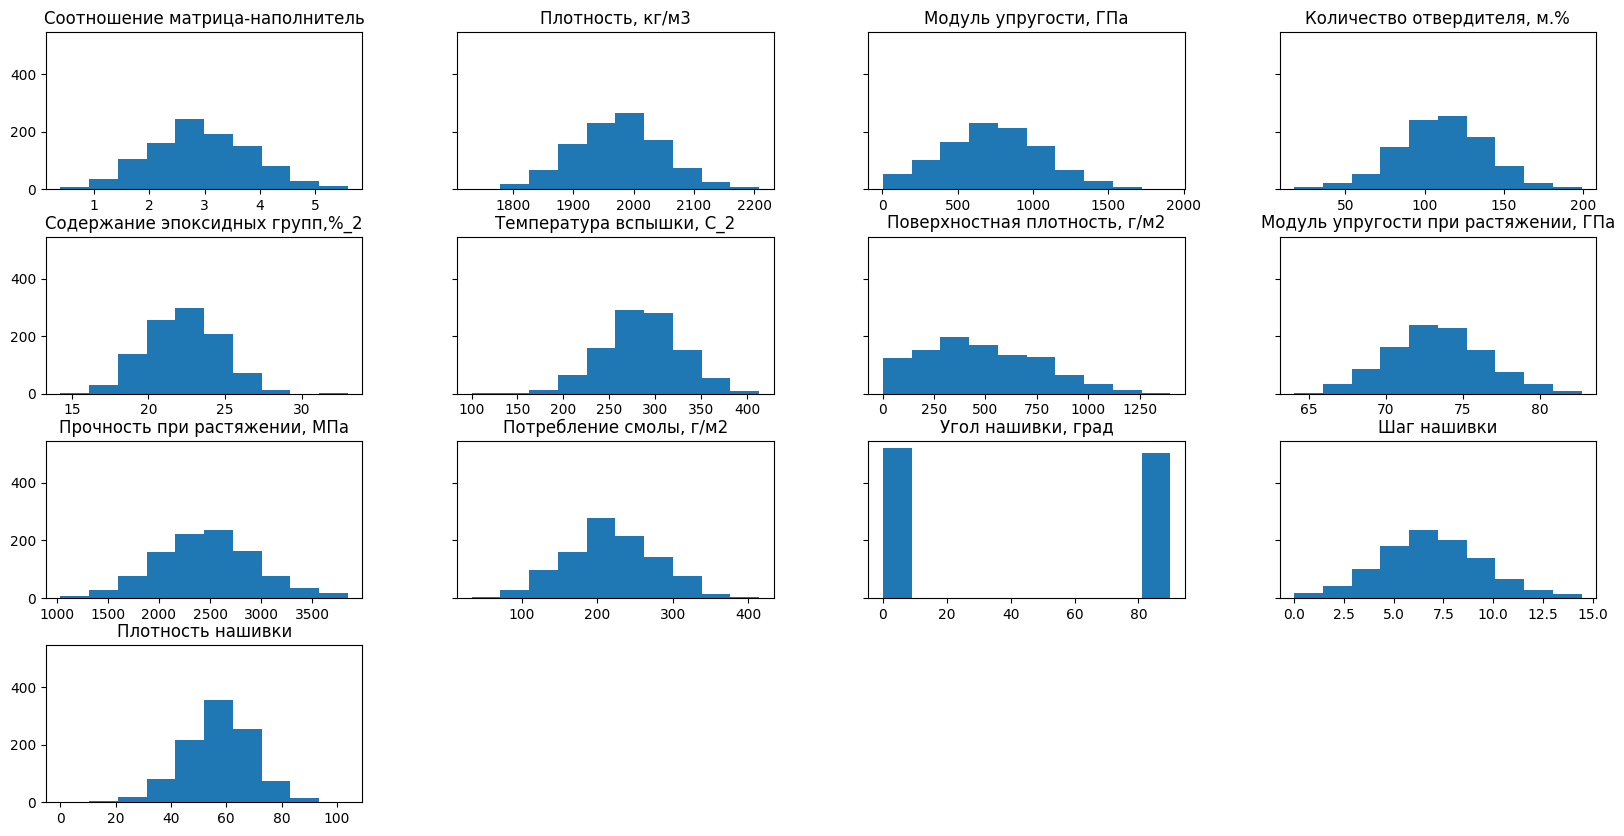

In [23]:
#Гистограммы по каждому значению
df.hist(column = None, grid = False, sharey = True, figsize = (20, 10), layout = None, bins = 10);

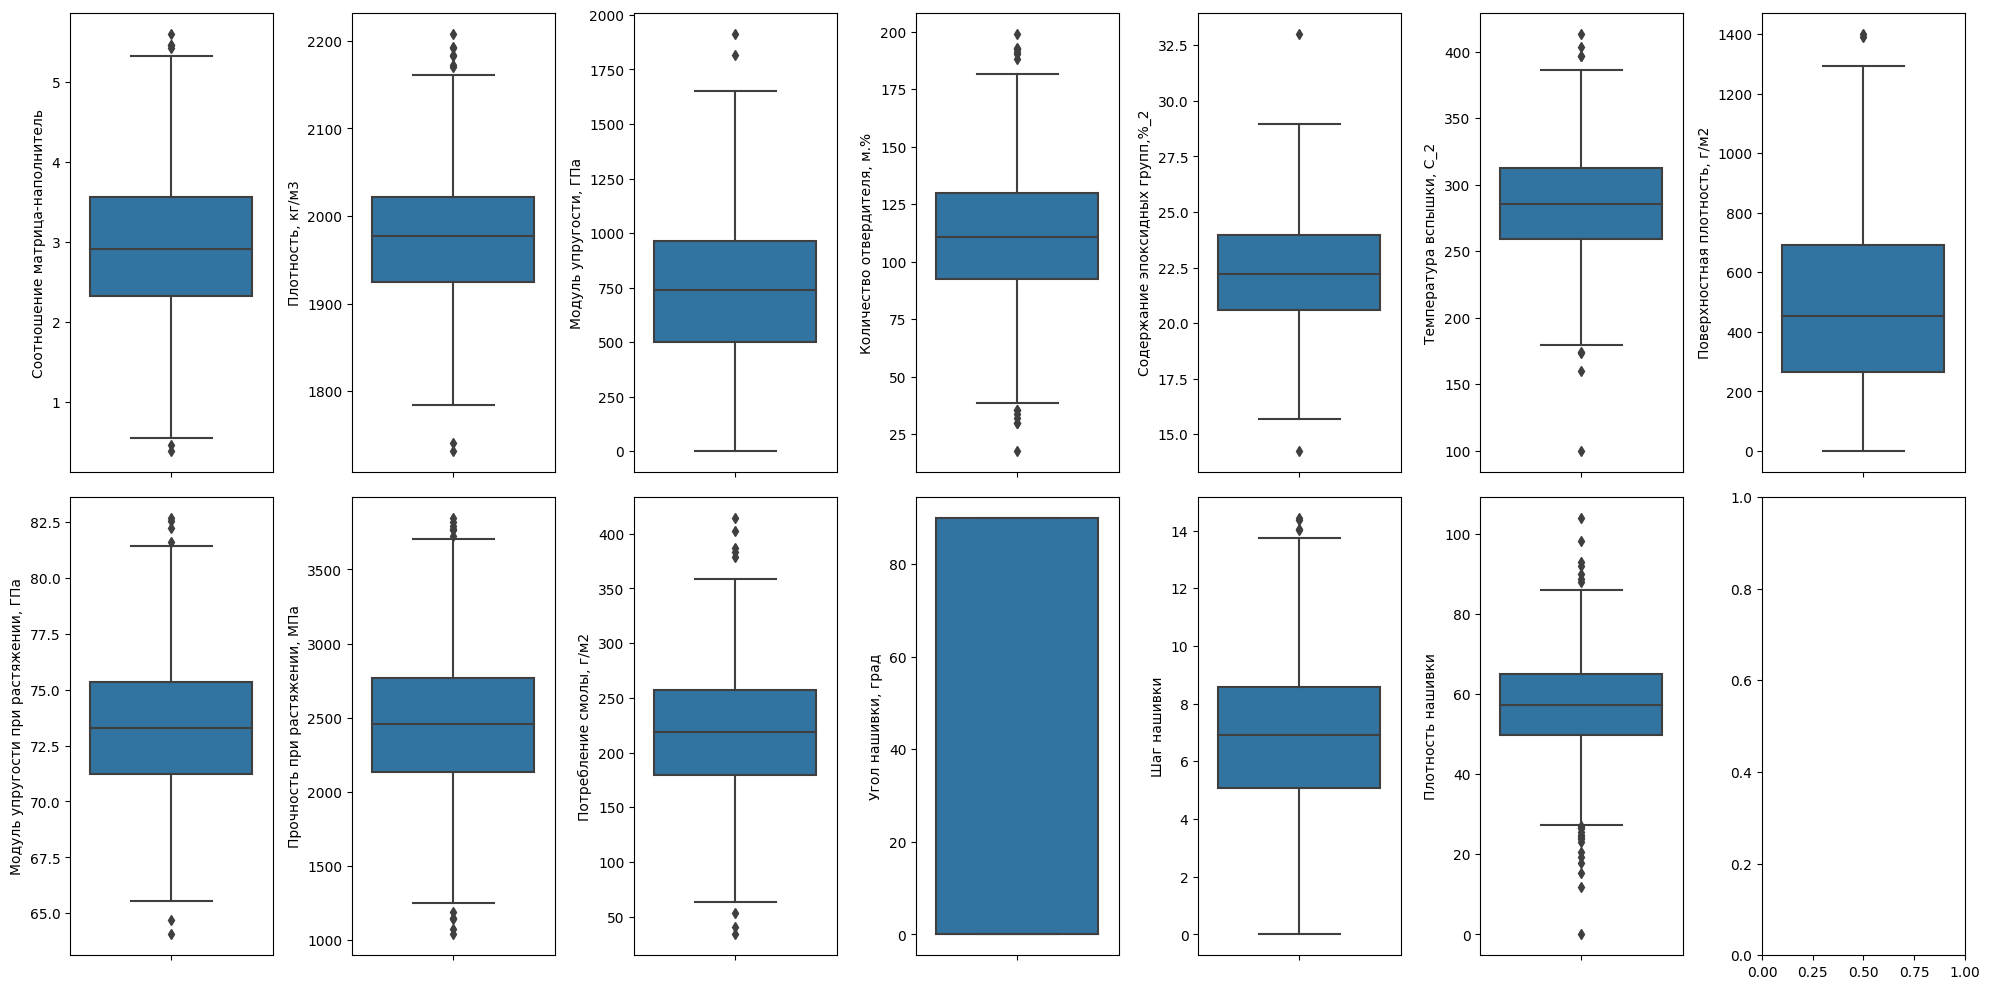

In [25]:
# Ящики с усами
fig, axs = plt.subplots(ncols = 7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, j in df.items():
    sns.boxplot(data = df, y = i, ax = axs[index])
    index += 1
plt.tight_layout(pad = 1.08, w_pad = 1.08)

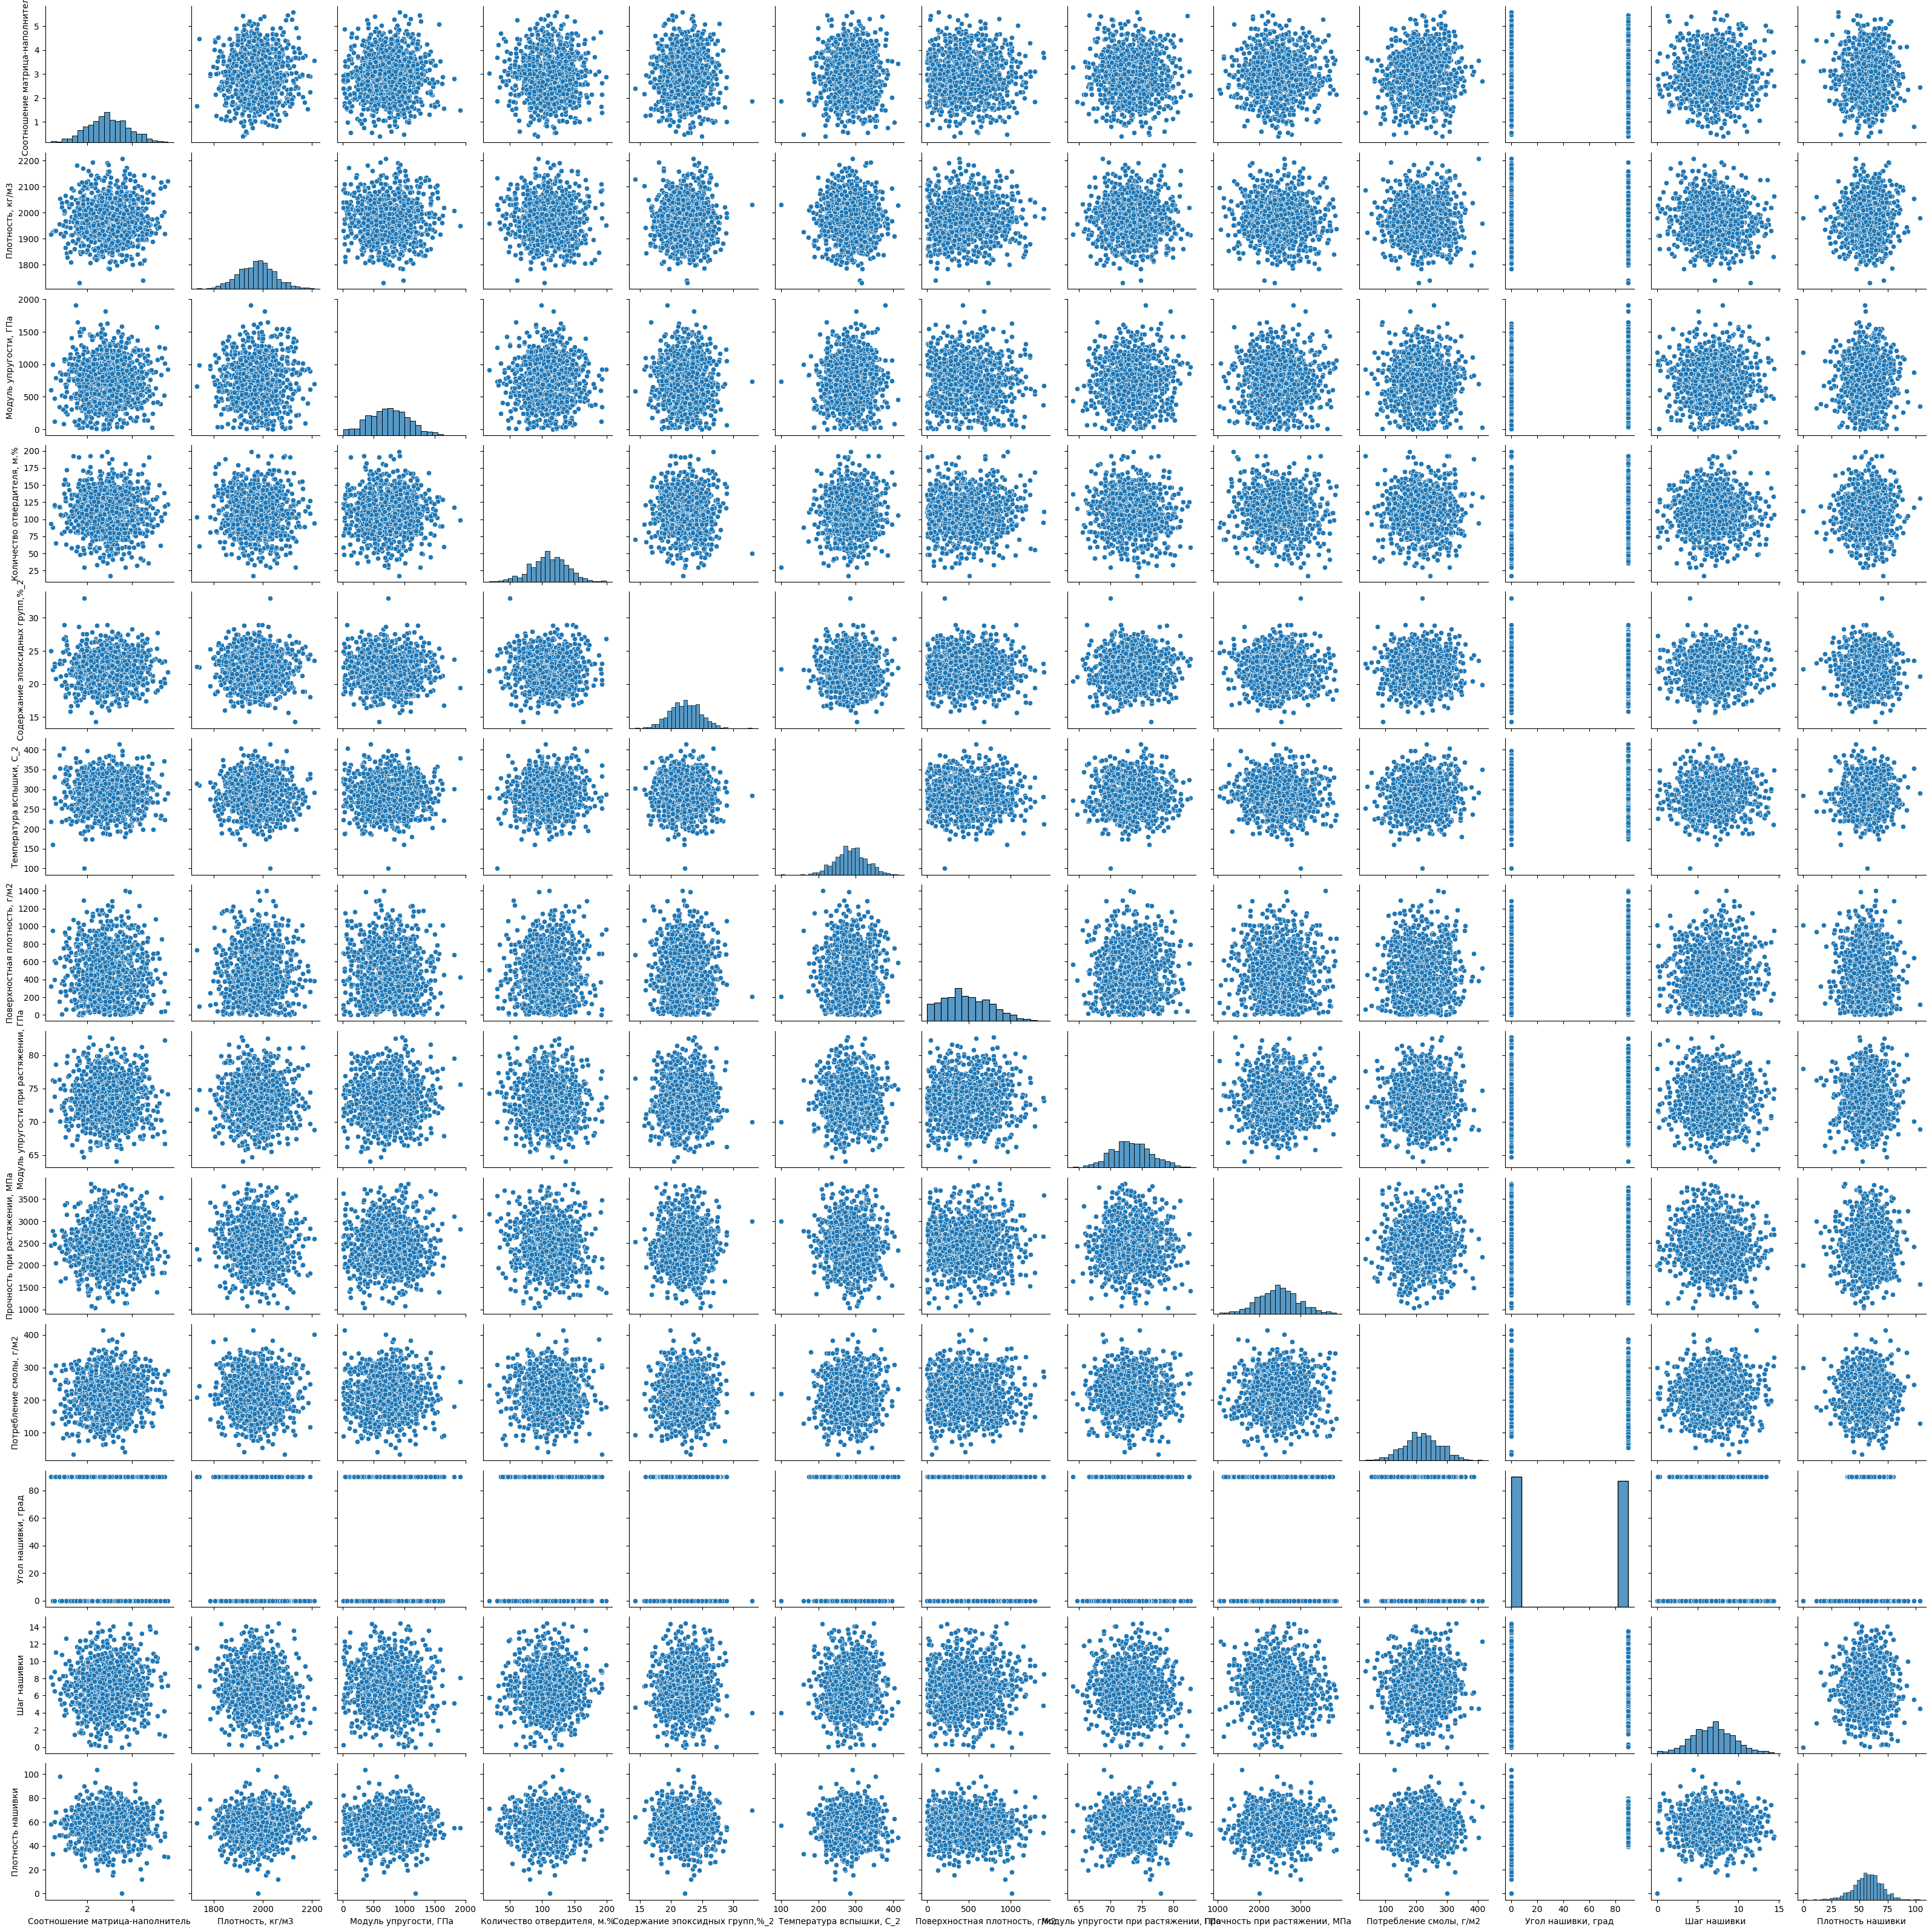

In [26]:
# Построим парные отношения в наборе данных
sns.pairplot(df, hue = None, hue_order = None, palette = None,
             vars = None, x_vars=None,  y_vars=None, kind='scatter',
             diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False,
             dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

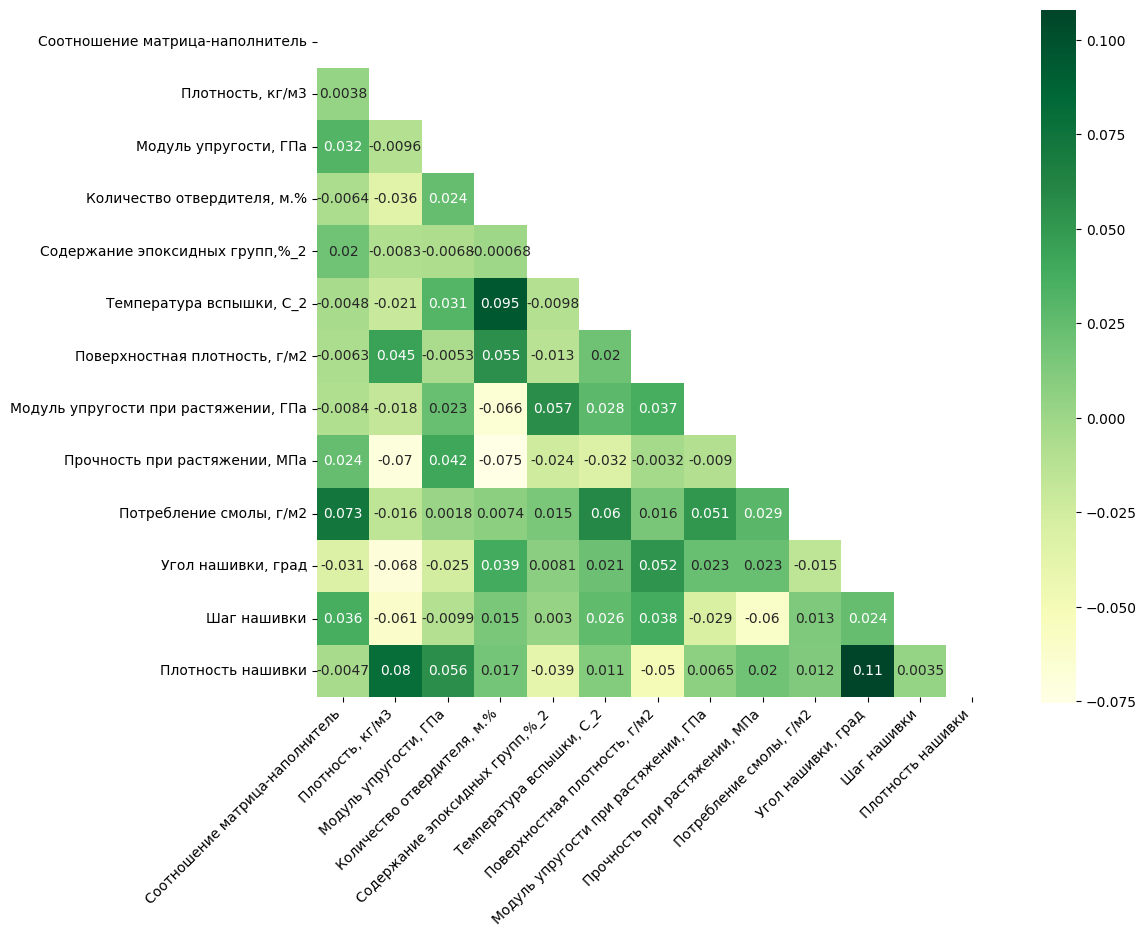

In [27]:
#Визуализация корреляционной матрицы с помощью тепловой карты
mask = np.triu(df.corr())
# Создаем полотно для отображения большого графика
f, ax = plt.subplots(figsize = (11, 9))
# Визуализируем данные кореляции и создаем цветовую палитру
sns.heatmap(df.corr(), mask = mask, annot = True, square = True, cmap = 'YlGn')
plt.xticks(rotation = 45, ha='right')
plt.show()
# Максимальная корреляция между плотностью нашивки и углом нашивки и составляет 0.11, что говорит об отсутствии зависимости между этими данными.
# Корреляция между всеми параметрами очень близка к 0, что говорит об отсутствии корреляционных связей между переменными.

In [31]:
#Создадим переменную для названия всех столбцов.
column_names = df.columns
column_names

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'Модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [34]:
# Определение выбросов методом межквартильных расстояний
metod_iq = 0
count_iq = []
for column in df:
    d = df.loc[:, [column]]
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    metod_iq += d['iq'].sum()
    count_iq.append(d['iq'].sum())
    print(column, ': ', d['iq'].sum())
print('Метод межквартильных расстояний, выбросов:', metod_iq)

Соотношение матрица-наполнитель :  6
Плотность, кг/м3 :  9
Модуль упругости, ГПа :  2
Количество отвердителя, м.% :  14
Содержание эпоксидных групп,%_2 :  2
Температура вспышки, С_2 :  8
Поверхностная плотность, г/м2 :  2
Модуль упругости при растяжении, ГПа :  6
Прочность при растяжении, МПа :  11
Потребление смолы, г/м2 :  8
Угол нашивки, град :  0
Шаг нашивки :  4
Плотность нашивки :  21
Метод межквартильных расстояний, выбросов: 93


In [37]:
#Создадим переменную со списком всех параметров, в которых есть выбросы
column_list_drop = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'Модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']

In [38]:
# Очистим данные от выбросов
for i in column_list_drop:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan

In [39]:
#Посмотрим на сумму пропущенных значений по каждому из столбцов
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
Модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [40]:
#Удаляем строки c пропущенными значениями
df = df.dropna(axis=0)

<ipython-input-45-e793a56a6bb2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(j, ax = axs[index])
<ipython-input-45-e793a56a6bb2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(j, ax = axs[index])
<ipython-input-45-e793a56a6bb2>:8: UserWarning: 

`distplot` is a deprecated function and will

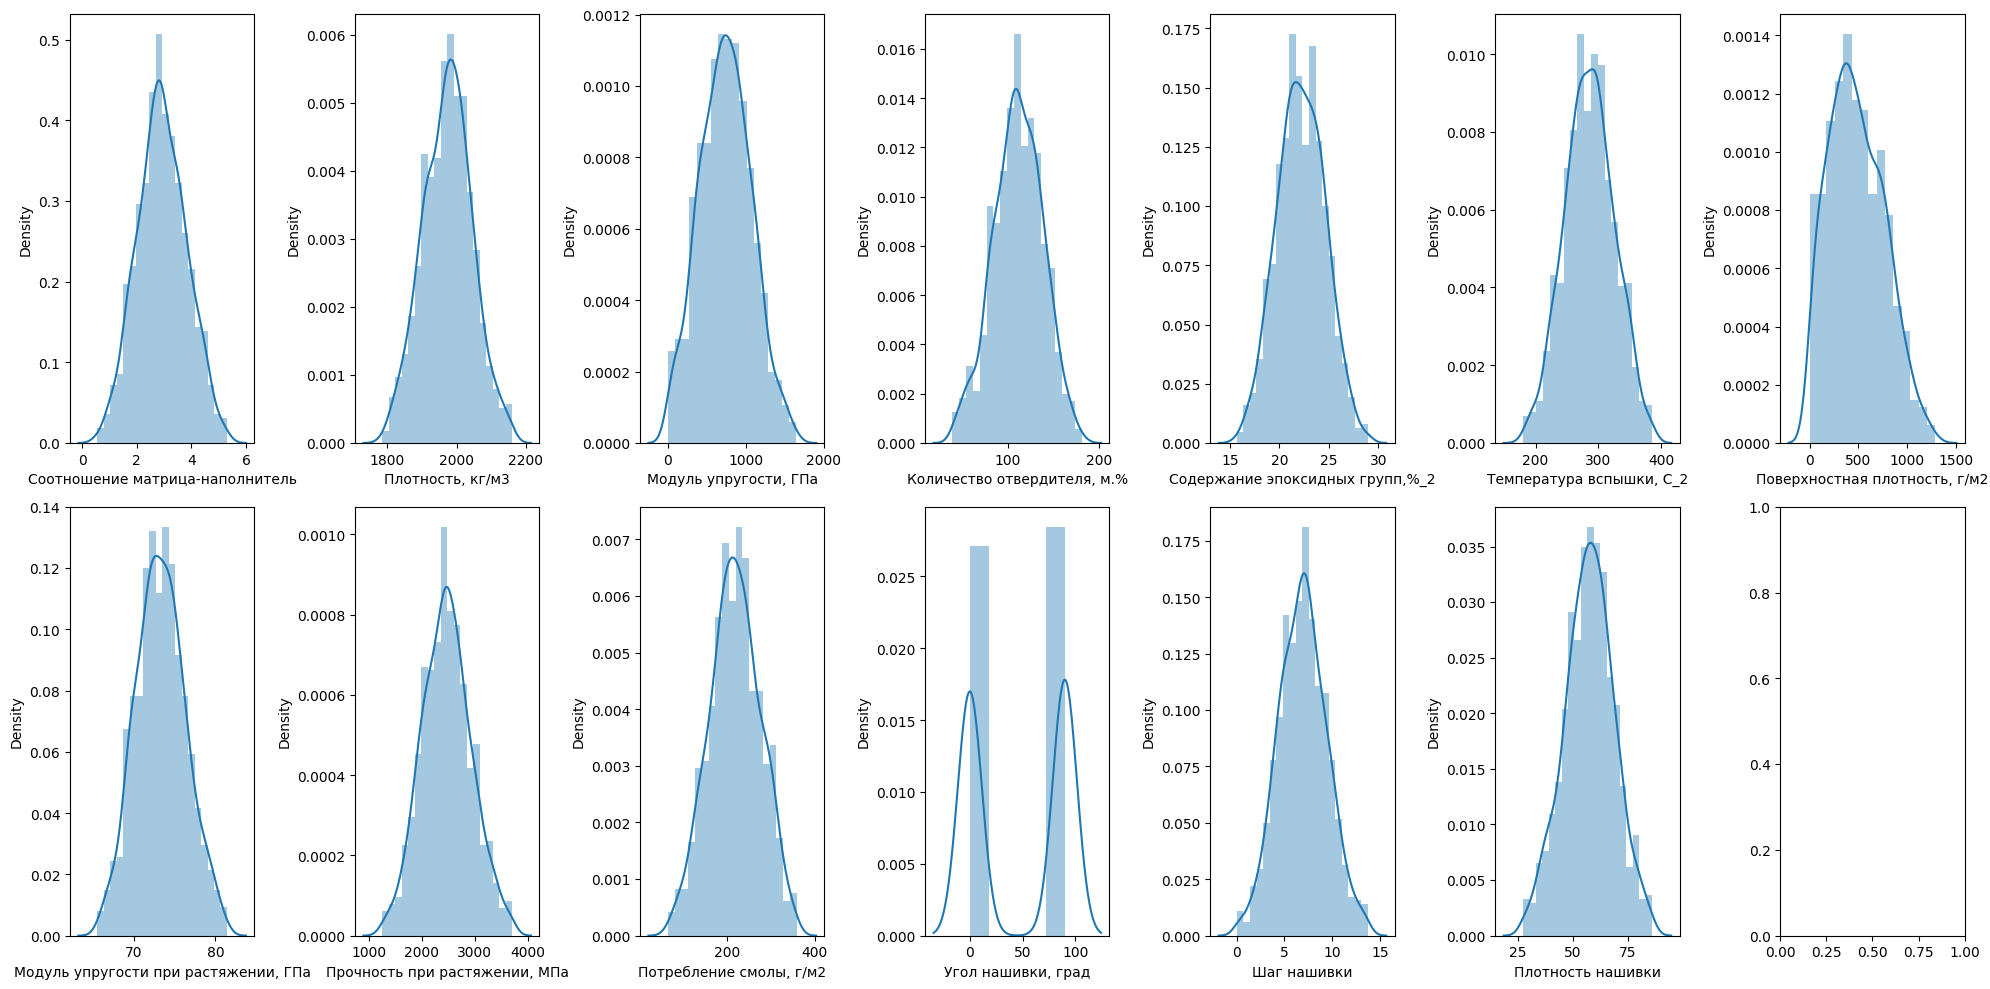

In [45]:
# Графики распределения
fig, axs = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))

index = 0
axs = axs.flatten()

for i, j in df.items():
    sns.distplot(j, ax = axs[index])
    index += 1

plt.tight_layout(pad = 1.08, w_pad = 1.08)

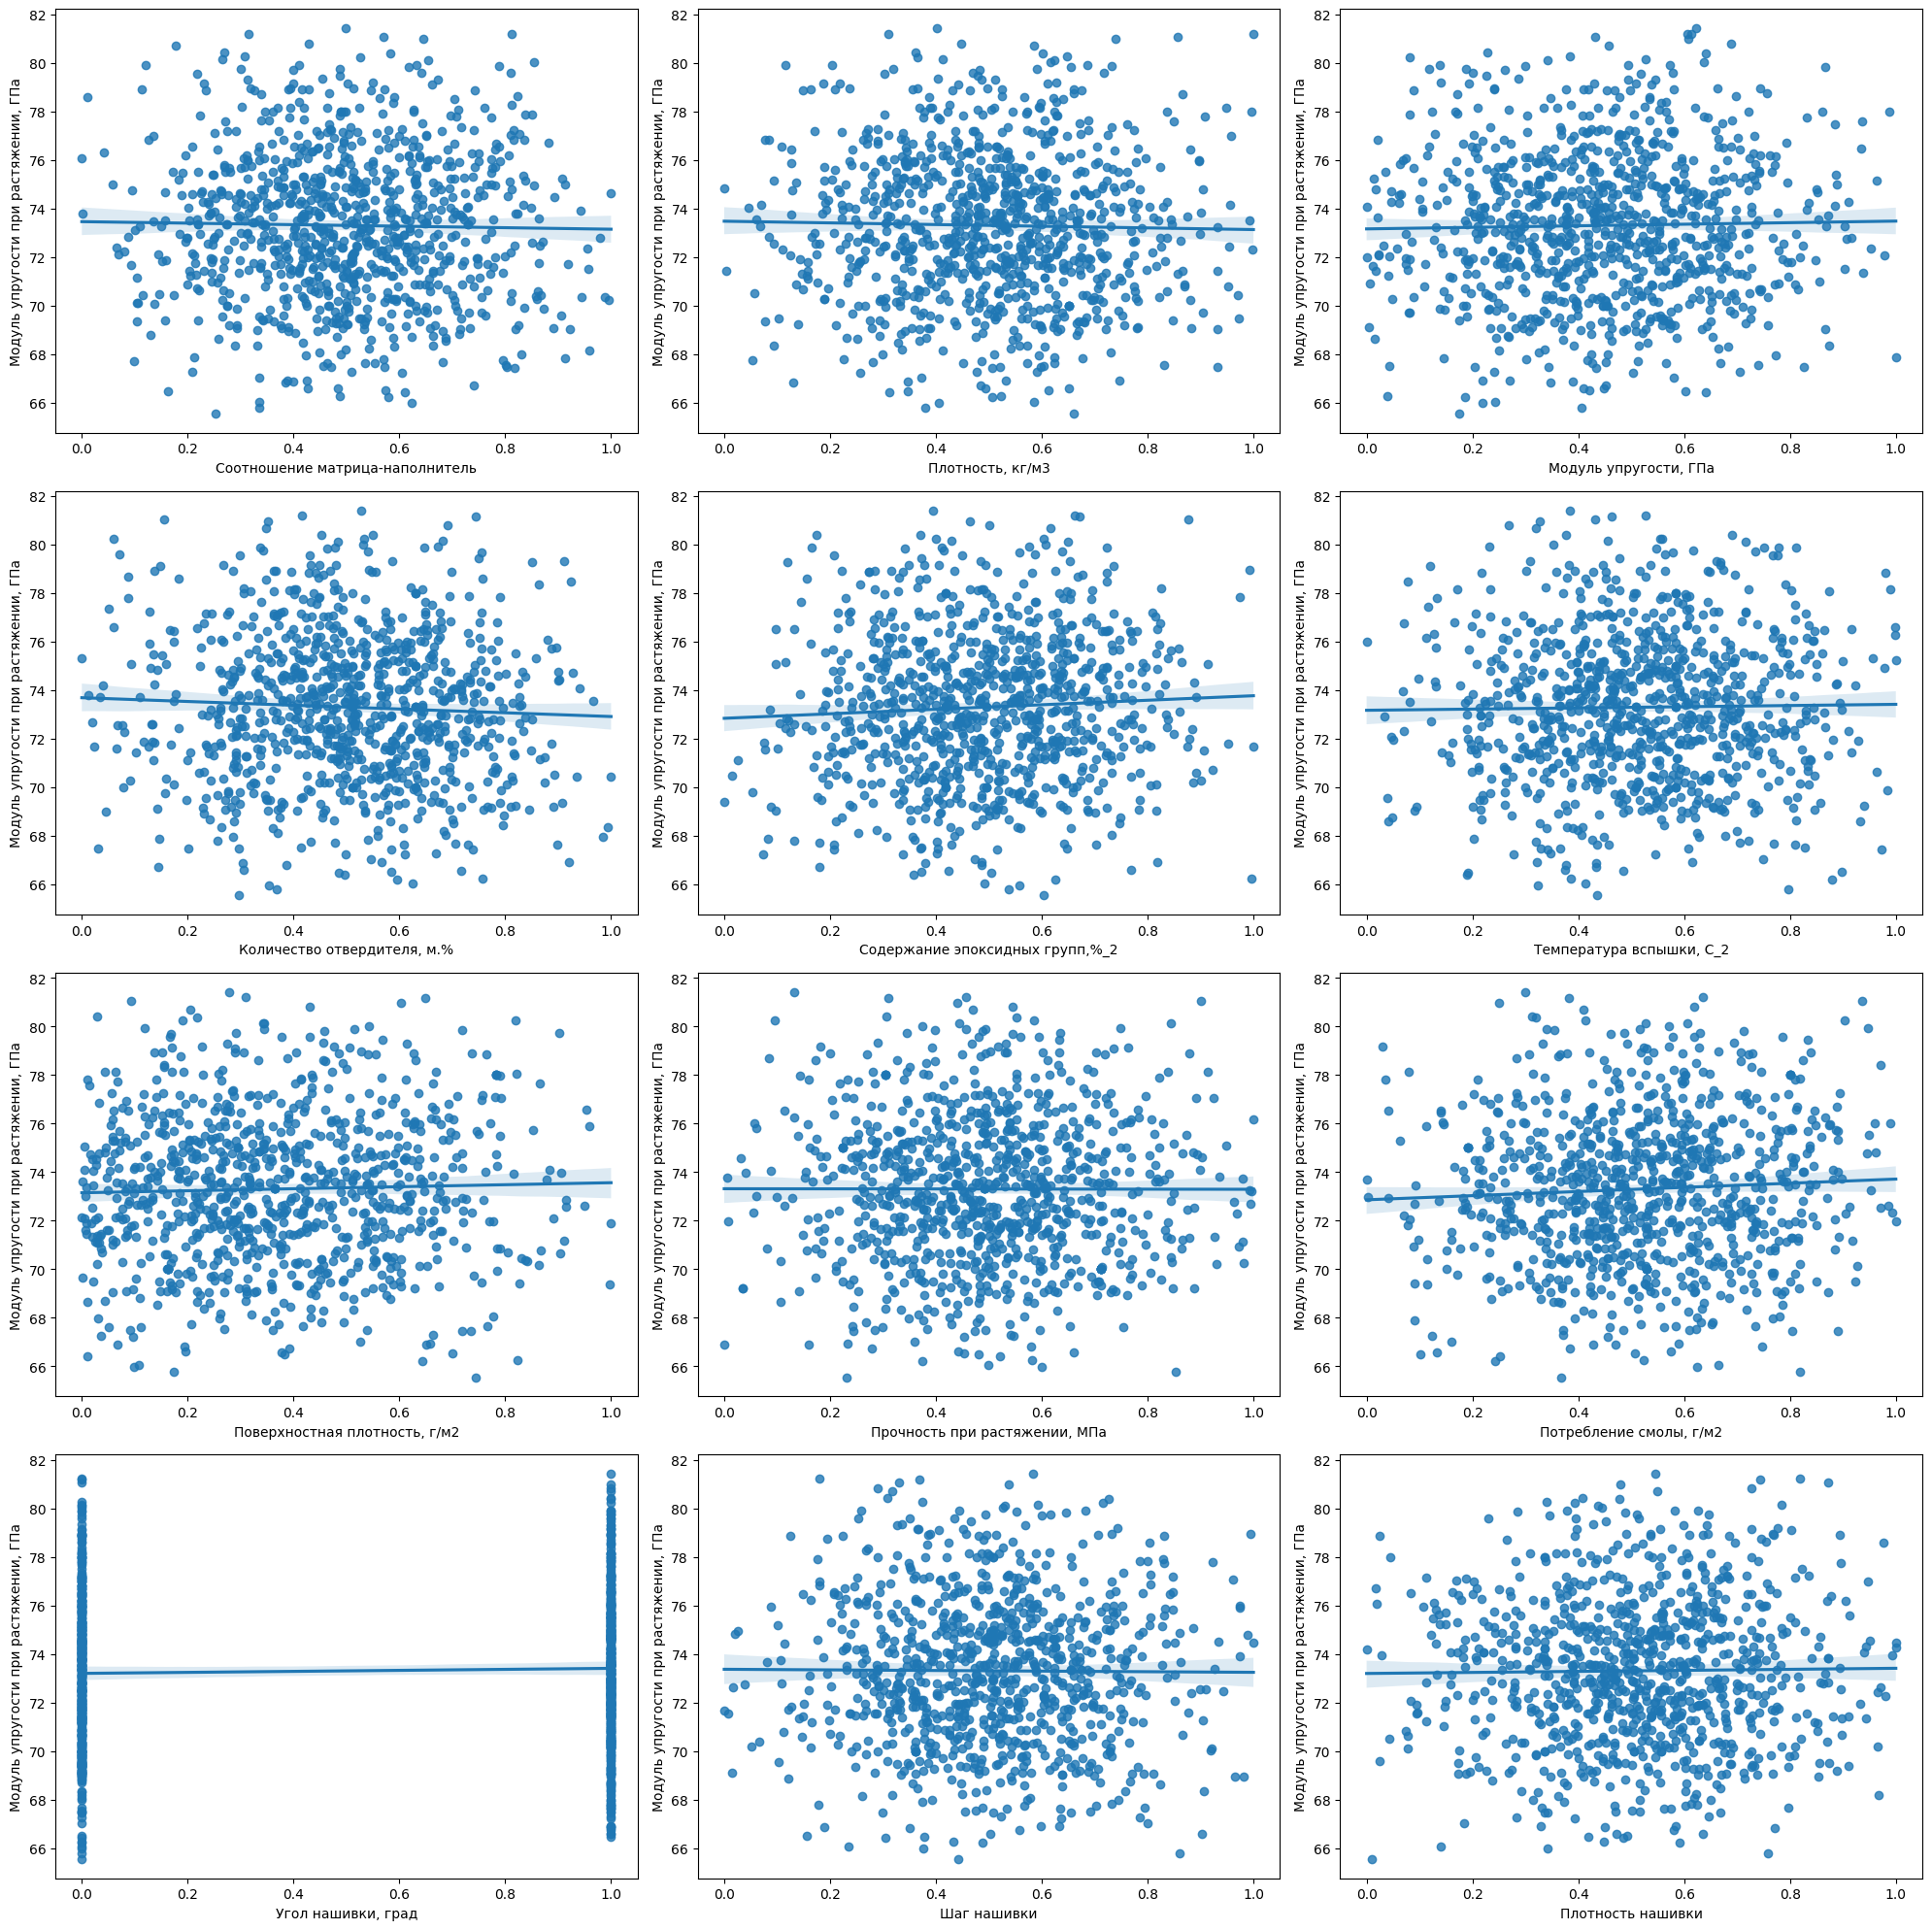

In [48]:
# Нормализация
# Парные графики относительно - "Модуль упругости при растяжении, ГПа"
min_max_scaler = preprocessing.MinMaxScaler()

X_without_elasticity = ['Соотношение матрица-наполнитель',
                        'Плотность, кг/м3',
                        'Модуль упругости, ГПа',
                        'Количество отвердителя, м.%',
                        'Содержание эпоксидных групп,%_2',
                        'Температура вспышки, С_2',
                        'Поверхностная плотность, г/м2',
                        'Прочность при растяжении, МПа',
                        'Потребление смолы, г/м2',
                        'Угол нашивки, град',
                        'Шаг нашивки',
                        'Плотность нашивки']

df_x = df.loc[:, X_without_elasticity]
df_y = df['Модуль упругости при растяжении, ГПа']

df_x_elasticity = pd.DataFrame(data = min_max_scaler.fit_transform(df_x),
                             columns = X_without_elasticity)

fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (20, 20))

index = 0
axs = axs.flatten()

for i, j in enumerate(X_without_elasticity):
    sns.regplot(x = df_x_elasticity[j], y = df_y, ax = axs[i])

plt.tight_layout(pad = 1.08, w_pad = 1.08)

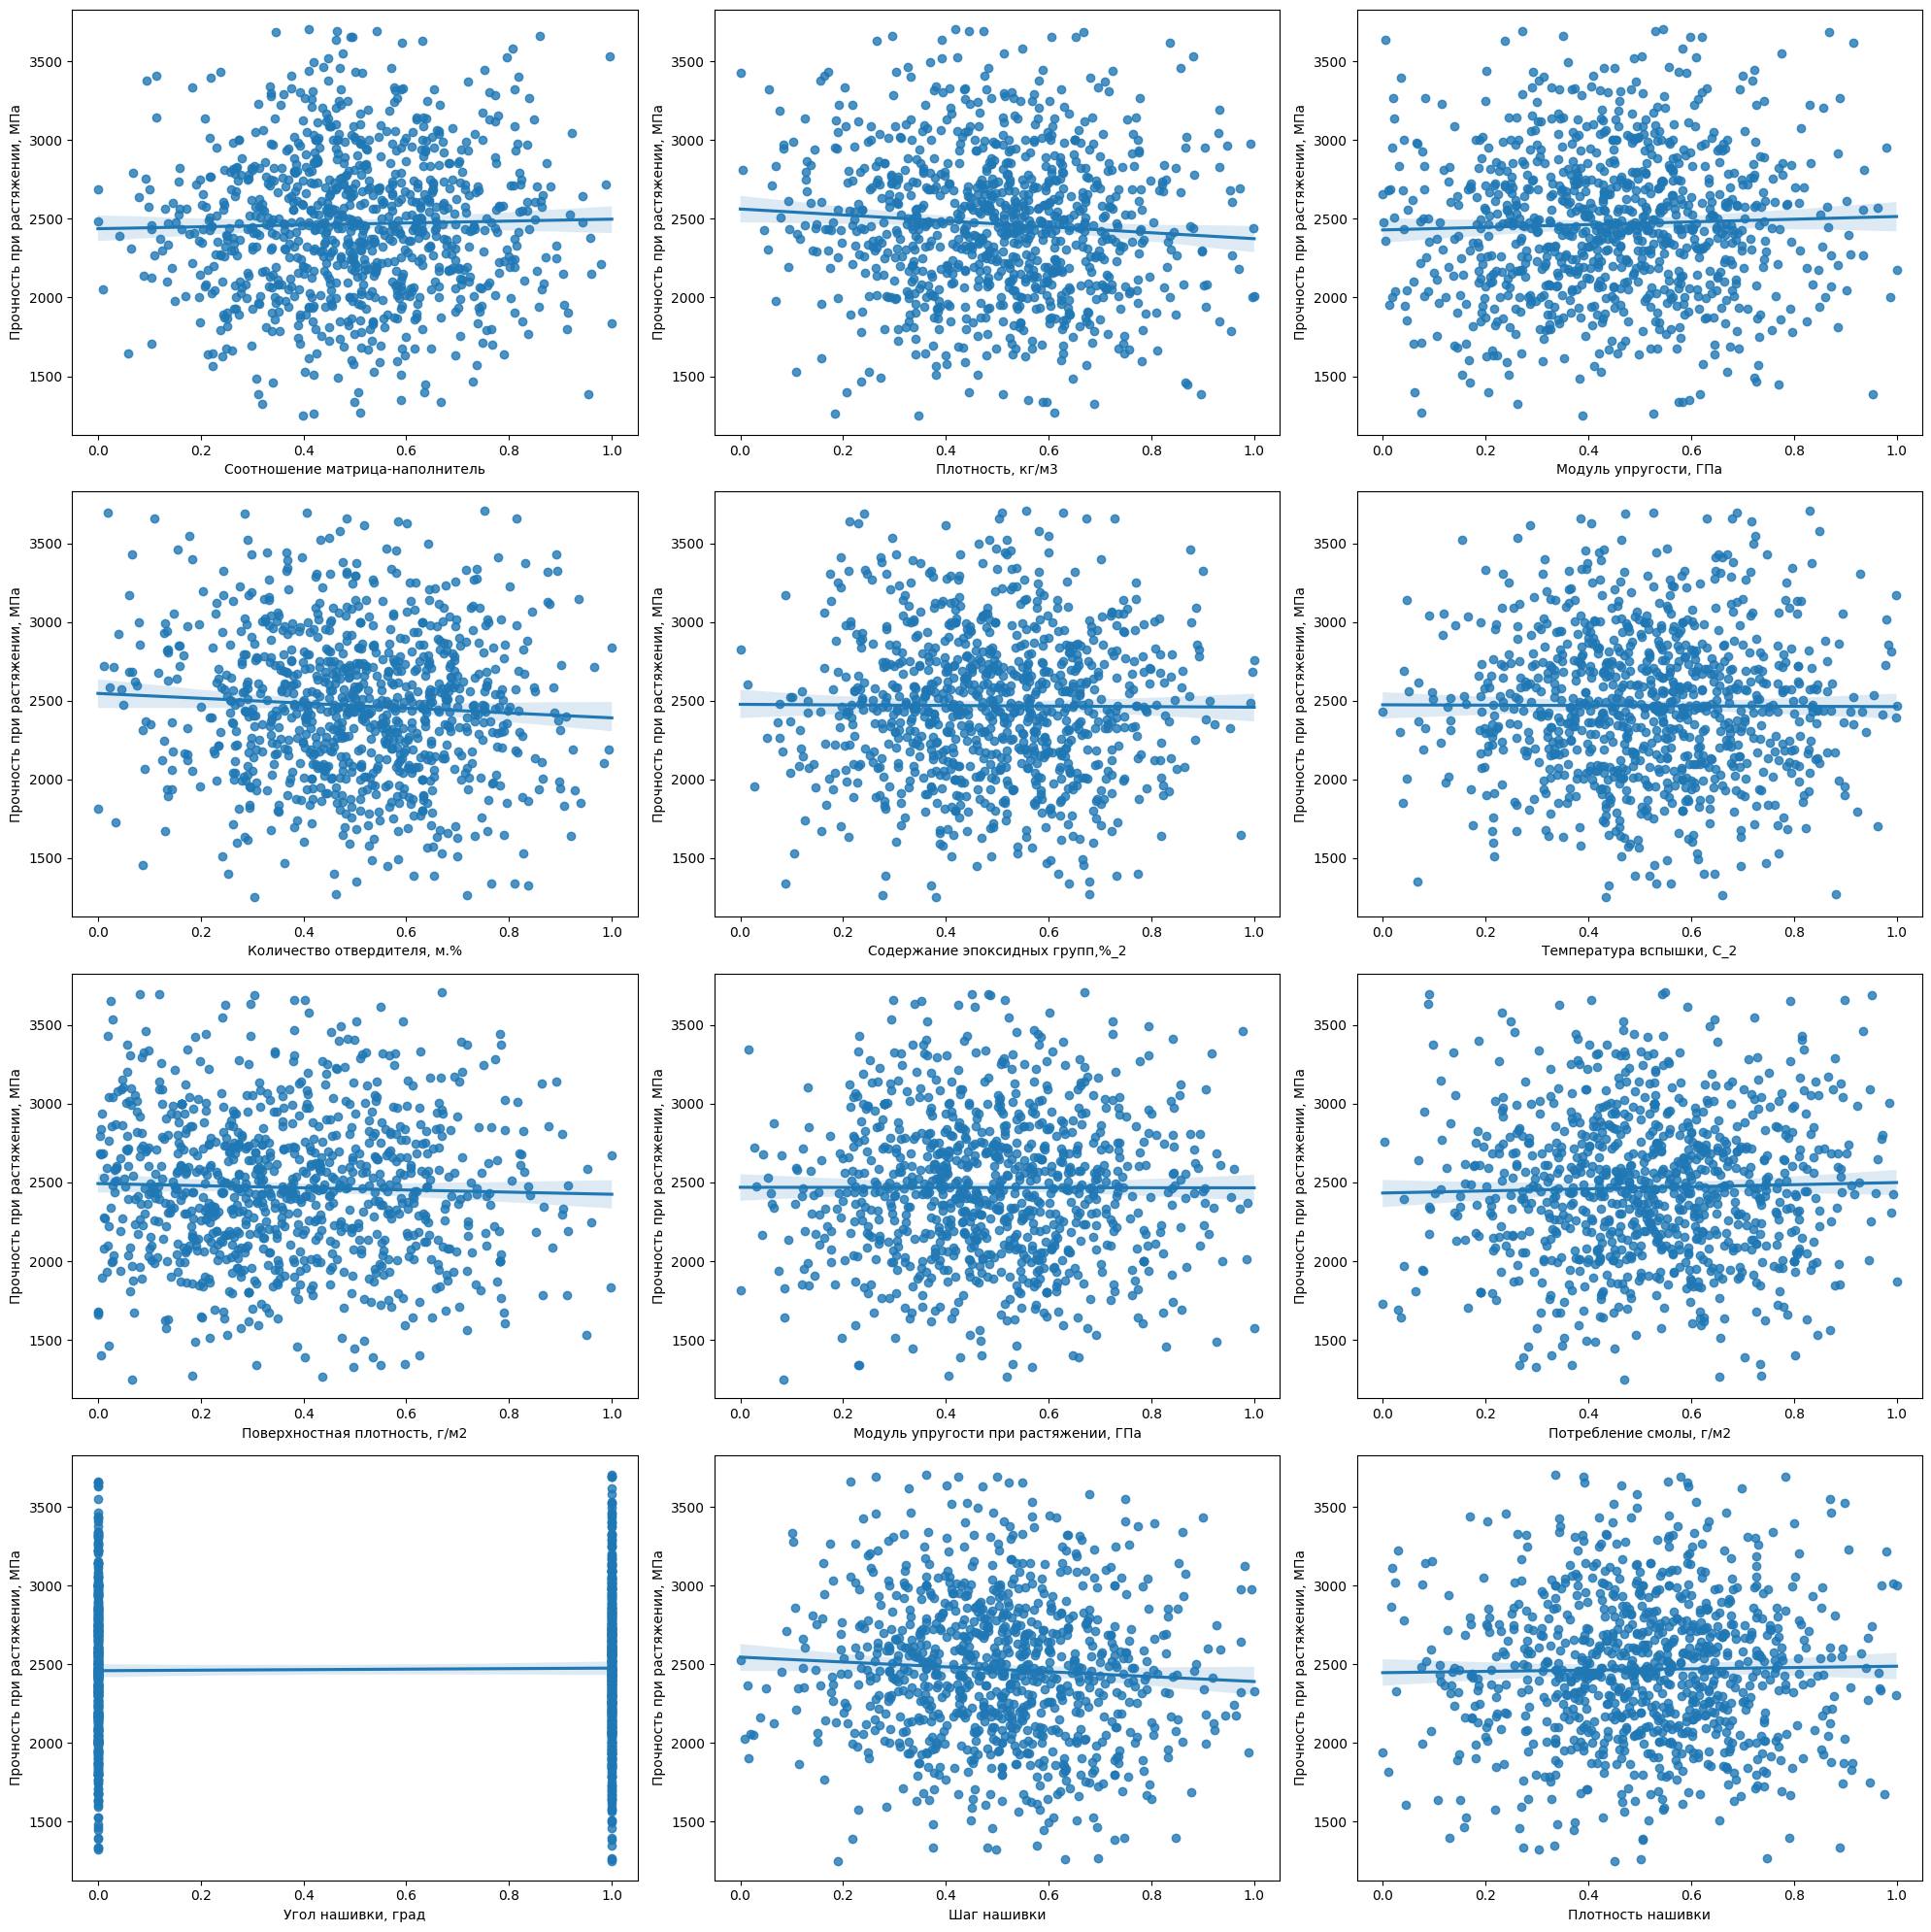

In [51]:
# Парные графики относительно - "Прочность при растяжении, МПа"
min_max_scaler = preprocessing.MinMaxScaler()

X_without_strength = ['Соотношение матрица-наполнитель',
                      'Плотность, кг/м3',
                      'Модуль упругости, ГПа',
                      'Количество отвердителя, м.%',
                      'Содержание эпоксидных групп,%_2',
                      'Температура вспышки, С_2',
                      'Поверхностная плотность, г/м2',
                      'Модуль упругости при растяжении, ГПа',
                      'Потребление смолы, г/м2',
                      'Угол нашивки, град',
                      'Шаг нашивки',
                      'Плотность нашивки']

df_x = df.loc[:, X_without_strength]
df_y = df['Прочность при растяжении, МПа']

df_x_strength = pd.DataFrame(data = min_max_scaler.fit_transform(df_x),
                             columns = X_without_strength)

fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (20, 20))

index = 0
axs = axs.flatten()

for i, j in enumerate(X_without_strength):
    sns.regplot(x = df_x_strength[j], y = df_y, ax = axs[i])

plt.tight_layout(pad = 1.08, w_pad = 1.08)

In [54]:
# Разделение на тестовую и обучающую выборки

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

X = np.array(df.drop('Модуль упругости при растяжении, ГПа', axis = 1))
y = np.array(df['Модуль упругости при растяжении, ГПа'])

y = y.reshape(-1, 1)

X_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled,
                                                    test_size = 0.3,
                                                    shuffle = True)

print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)

X_train: (655, 12) y_train: (655, 1)
X_test: (281, 12) y_test: (281, 1)


In [55]:
# Линейная регрессия ...
scores_map = {}

# Линейная регрессия методом наименьших квадратов
l_regressor = LinearRegression()
l_regressor.fit(X_train, y_train)

y_pred = l_regressor.predict(X_test)

kf = KFold(n_splits=10)

scores = cross_val_score(l_regressor, X_scaled, y_scaled, cv = kf,
                         scoring='neg_mean_squared_error')


#y_pred = standard_scaler.inverse_transform(l_regressor.predict([X_test[10]]))
#
#l_regressor.predict(standard_scaler.transform(X_valid))

scores_map['LinearRegression'] = scores

print('Обычная линейная регрессия методом наименьших квадратов')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\n')

# Линейный метод наименьших квадратов с регуляризацией l2
l_ridge = linear_model.Ridge()
l_ridge.fit(X_train, y_train)

y_pred = l_ridge.predict(X_test)

scores = cross_val_score(l_ridge, X_scaled, y_scaled, cv = kf,
                         scoring='neg_mean_squared_error')

scores_map['Ridge'] = scores

print('Линейный метод наименьших квадратов с регуляризацией l2')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\n')

p_ridge = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
p_ridge.fit(X_train, y_train)

y_pred = p_ridge.predict(X_test)

scores = cross_val_score(p_ridge, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['PolyRidge'] = scores

print('PolyRidge')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Обычная линейная регрессия методом наименьших квадратов
MAE:  0.163345213806803
MSE:  0.04096273465044369
RMSE:  0.20239252617239525


Линейный метод наименьших квадратов с регуляризацией l2
MAE:  0.16334219999052718
MSE:  0.04094293479410268
RMSE:  0.20234360576529883


PolyRidge
MAE:  0.16266432247029197
MSE:  0.04178292346809555
RMSE:  0.20440871671260877


In [56]:
# Regression based on k-nearest neighbors ...
knn = KNeighborsRegressor(n_neighbors = 5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

scores = cross_val_score(knn, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['KNeighborsRegressor'] = scores
print('Regression based on k-nearest neighbors ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Regression based on k-nearest neighbors ...
MAE:  0.17725761225815873
MSE:  0.0498101294129285
RMSE:  0.22318183038260192


In [57]:
# Дерево решений ...
desc_tr = DecisionTreeRegressor(max_depth = None)

desc_tr.fit(X_train, y_train)

y_pred = desc_tr.predict(X_test)

scores = cross_val_score(desc_tr, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['DecisionTreeRegressor'] = scores

print('Дерево решений ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Дерево решений ...
MAE:  0.2199779087909073
MSE:  0.07580333371455503
RMSE:  0.2753240521904235


In [58]:
# Gradient Boosting ...
gbr = GradientBoostingRegressor(alpha = 0.9, learning_rate = 0.1, max_depth = 2,
                                min_samples_leaf = 1, min_samples_split = 3,
                                n_estimators = 100, random_state = 30)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)


scores = cross_val_score(gbr, X_scaled, y_scaled, cv = kf,
                         scoring = 'neg_mean_squared_error')

scores_map['GradientBoostingRegressor'] = scores

print('Gradient Boosting ...')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Gradient Boosting ...
MAE:  0.16673925589137628
MSE:  0.043286461472884064
RMSE:  0.2080539869189823


<Axes: >

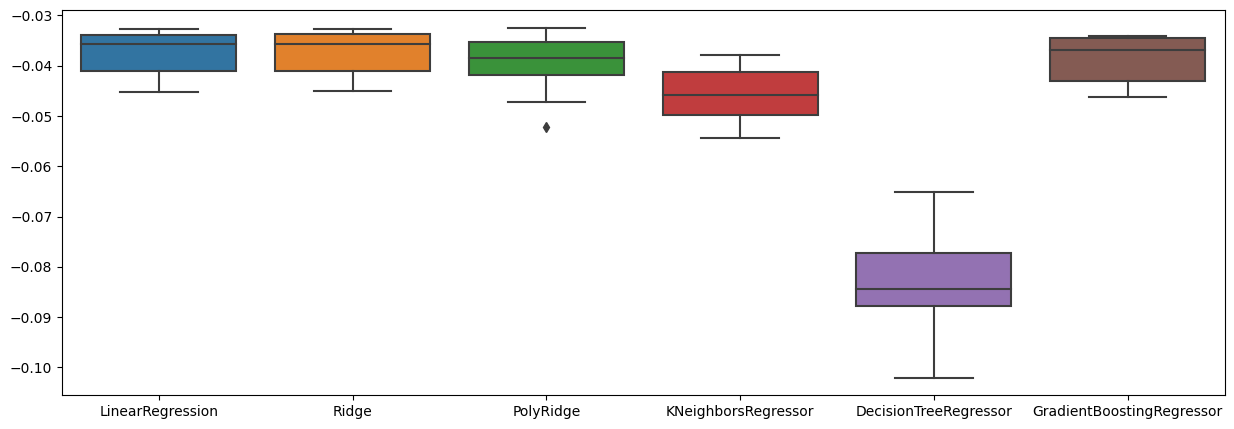

In [59]:
# Сравнение моделей с параметрами по умолчанию
plt.figure(figsize=(15, 5))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data = scores_map)

In [60]:
scores_map.style.highlight_max(axis = 0)

Исходя из метрик, можно сделать следующие выводы:

Модели линейной регрессии (обычной и с регуляризацией L2) и PolyRidge демонстрируют схожие результаты и имеют наименьшие значения RMSE, что указывает на их хорошую производительность.
Модель KNeighborsRegressor имеет большие значения MAE, MSE и RMSE, что может указывать на более слабую производительность по сравнению с линейными моделями.
Модель DecisionTreeRegressor имеет наибольшие значения MAE, MSE и RMSE, что указывает на её наименее точную производительность среди всех моделей.
Модель GradientBoostingRegressor также показывает хорошую производительность, с близкими значениями к линейным моделям, но с небольшими улучшениями.